In [1]:
import numpy as np, curvedsky, local, healpy as hp, pickle
from matplotlib.pyplot import *
from pixell import enmap

In [2]:
from tools_cmb import *

In [3]:
q = 'boss_d03'
aobj = local.init_analysis_params(qid=q,fltr='cinv',snmin=1,snmax=10)
bl = beam_func(aobj.lmax,q)

In [4]:
mask = load_window_curvedsky( aobj, with_ivar=False, add_mask=False )
W2 = np.average(mask**2)

In [5]:
T  = np.zeros((1,1,aobj.npix))
print(aobj.nside,aobj.npix,aobj.lmax)

2048 50331648 4096


In [6]:
Ts = enmap.read_map(aobj.fmap['s'][0])[0]
#Tn = enmap.read_map(aobj.fmap['n'][1])[0]
Tn = 0.
T[0,0,:] = mask*enmap.to_healpix( remove_lxly( Ts+Tn, lmin=aobj.clmin, lmax=aobj.lmax ), nside=aobj.nside )

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you

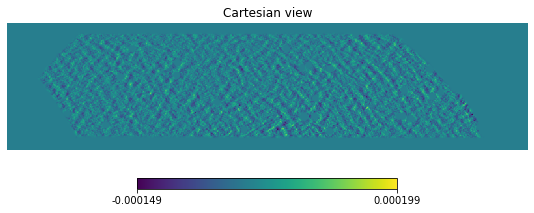

In [7]:
hp.cartview(T[0,0,:],lonra=[140,250],latra=[-5,22])

In [8]:
Nij = np.zeros((1,1,aobj.npix))

In [9]:
Nvar = load_ivar_curvedsky(aobj)

In [10]:
Nij[0,0,:] = mask * Nvar/np.max(Nvar) * (65.*(np.pi/10800.)/2.726e6)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you

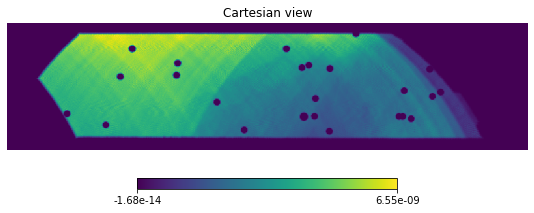

In [11]:
hp.cartview(Nij[0,0,:],lonra=[140,250],latra=[-5,22])

In [12]:
tlm = pickle.load(open(aobj.falm['c']['T'][0],"rb"))
tmap = curvedsky.utils.hp_alm2map(aobj.nside,aobj.lmax,aobj.lmax,tlm)

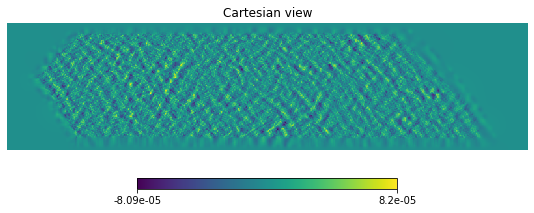

In [13]:
hp.cartview(tmap,lonra=[140,250],latra=[-5,22])

In [15]:
cl = np.zeros(aobj.lmax+1)
Cl = np.zeros(aobj.lmax+1)
xl = np.zeros(aobj.lmax+1)
Xl = np.zeros(aobj.lmax+1)
il = np.zeros(aobj.lmax+1)
for rlz in aobj.rlz[:5]:
    print(rlz)
    tlm = pickle.load(open(aobj.falm['c']['T'][rlz],"rb"))
    cl += curvedsky.utils.alm2cl(aobj.lmax,tlm)
    Ts = enmap.read_map(aobj.fmap['s'][rlz])[0]
    Tn = enmap.read_map(aobj.fmap['n'][rlz])[0]
    Tmap = mask*enmap.to_healpix( remove_lxly( Ts+Tn, lmin=aobj.clmin, lmax=aobj.lmax ), nside=aobj.nside )
    Tlm = curvedsky.utils.hp_map2alm(aobj.nside,aobj.lmax,aobj.lmax,Tmap)
    Cl += curvedsky.utils.alm2cl(aobj.lmax,Tlm)
    f = '/project/projectdirs/act/data/actsims_data/signal_v0.4/fullskyLensedUnabberatedCMB_alm_set00_'+str(rlz).zfill(5)+'.fits'
    Tlm_inp = np.complex128( hp.fitsfunc.read_alm( f, hdu = (1) ) ) / local.Tcmb
    ilmax = hp.sphtfunc.Alm.getlmax(len(Tlm_inp))
    Tlm_inp = curvedsky.utils.lm_healpy2healpix(Tlm_inp, ilmax)[:aobj.lmax+1,:aobj.lmax+1]
    il += curvedsky.utils.alm2cl(aobj.lmax,Tlm_inp)
    xl += curvedsky.utils.alm2cl(aobj.lmax,tlm,Tlm_inp)
    Xl += curvedsky.utils.alm2cl(aobj.lmax,Tlm,Tlm_inp)

1
2
3
4
5


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


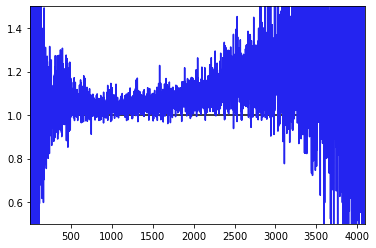

In [16]:
xlim(1,4096)
ylim(0.5,1.5)
axhline(1,color='k')
plot(xl**2/cl*Cl/Xl**2)
#plot(Xl**2/il/Cl)